In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

## Applied Pandas Example: Create a basic climograph

#### Daily temperature (max/min) and precipitation from O'Hare Airport (1991-2020) were downloaded as a CSV file from: https://www.ncei.noaa.gov/cdo-web/datasets/GHCND/stations/GHCND:USW00094846/detail

#### We can use 'read_csv' to open the CSV file from NCEI using Pandas.

In [2]:
# Open the CSV using pandas
df = pd.read_csv("/home/mandrews4/projects/Ohare_temp_precip.csv")
df

,STATION,NAME,DATE,PRCP,TMAX,TMIN
0,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",1991-01-01,0.00,30,12
1,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",1991-01-02,0.00,24,6
2,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",1991-01-03,0.00,16,-2
3,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",1991-01-04,0.00,24,3
4,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",1991-01-05,0.26,30,21
...,...,...,...,...,...,...
10953,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",2020-12-27,0.00,47,25
10954,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",2020-12-28,0.00,34,21
10955,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",2020-12-29,0.52,32,18
10956,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",2020-12-30,0.19,35,26


#### Converting the DATE column to a datetime object is helpful for working with the data (it allows us to select or group by month/year more easily). We also set the date column as the index of the Pandas DataFrame.

In [3]:
# Convert DATE column to a datetime object; "%Y-%m-%d" matches the date format given in the dataset
df['DATE'] = pd.to_datetime(df.DATE, format="%Y-%m-%d")
# Set the DATE column as the index
df = df.set_index('DATE')
df

,STATION,NAME,PRCP,TMAX,TMIN
DATE,,,,,
1991-01-01,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",0.00,30,12
1991-01-02,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",0.00,24,6
1991-01-03,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",0.00,16,-2
1991-01-04,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",0.00,24,3
1991-01-05,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",0.26,30,21
...,...,...,...,...,...
2020-12-27,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",0.00,47,25
2020-12-28,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",0.00,34,21
2020-12-29,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",0.52,32,18


#### We don't have any use for the STATION OR NAME columns, so we can drop them from the DataFrame.

In [4]:
# Drop STATION and NAME columns
df = df.drop(columns=['STATION', 'NAME'])
df

,PRCP,TMAX,TMIN
DATE,,,
1991-01-01,0.00,30,12
1991-01-02,0.00,24,6
1991-01-03,0.00,16,-2
1991-01-04,0.00,24,3
1991-01-05,0.26,30,21
...,...,...,...
2020-12-27,0.00,47,25
2020-12-28,0.00,34,21
2020-12-29,0.52,32,18


#### We can easily locate the minimum and maximum of any field over the full period or a subset of the data. For example, we can find the highest daily high temperature (TMAX) and lowest daily low temperature (TMIN) throughout the full period, as well as maximum amount of daily precipitation (PRCP).

In [5]:
# Find daily maximum high temperature (TMAX) from 1928-present
df.TMAX.max()

104

In [6]:
# Find the daily minimum low temperature (TMIN) from 1928-present. 
df.TMIN.min()

-23

In [7]:
# Find the daily maximum precipitation (PRCP) from 1928-present. Given in inches.
df.PRCP.max()

6.86

#### For our climograph, we'll want an average temperature column. We can calculate average temperature each day using TMAX and TMIN (TAVG = (TMAX + TMIN) / 2). We'll want to add average temperature to our DataFrame. df['TAVG'] creates a new column named TAVG, derived from our TAVG calculation using TMAX and TMIN.

In [8]:
# Calculate the average daily temperature each day using TMAX and TMIN
df['TAVG'] = ((df.TMAX + df.TMIN) / 2)
df

,PRCP,TMAX,TMIN,TAVG
DATE,,,,
1991-01-01,0.00,30,12,21.0
1991-01-02,0.00,24,6,15.0
1991-01-03,0.00,16,-2,7.0
1991-01-04,0.00,24,3,13.5
1991-01-05,0.26,30,21,25.5
...,...,...,...,...
2020-12-27,0.00,47,25,36.0
2020-12-28,0.00,34,21,27.5
2020-12-29,0.52,32,18,25.0


### We can now make a basic climograph with our Pandas dataframe.

#### To get the monthly average TMAX, TMIN, and TAVG, we need to group the data by month and then take the mean. We use the groupby function to do so. 'df.index.month' specifies that we want to group the selected variable by the Pandas index (date, in our example) on a monthly basis. Mean calculates the average of our variables for each month.

In [9]:
monthly_TMAX = df.TMAX.groupby(df.index.month).mean()
monthly_TMAX

DATE
1     31.244086
2     35.452830
3     46.682796
4     58.741111
5     70.197849
6     80.065556
7     84.232258
8     82.179570
9     75.244444
10    62.387097
11    48.131111
12    36.297849
Name: TMAX, dtype: float64

In [10]:
monthly_TMIN = df.TMIN.groupby(df.index.month).mean()
monthly_TMIN

DATE
1     17.219355
2     20.225236
3     29.498925
4     38.906667
5     49.262366
6     59.286667
7     64.925806
8     63.727957
9     55.680000
10    43.933333
11    32.648889
12    22.889247
Name: TMIN, dtype: float64

In [11]:
monthly_TAVG = df.TAVG.groupby(df.index.month).mean()
monthly_TAVG

DATE
1     24.231720
2     27.839033
3     38.090860
4     48.823889
5     59.730108
6     69.676111
7     74.579032
8     72.953763
9     65.462222
10    53.160215
11    40.390000
12    29.593548
Name: TAVG, dtype: float64

#### For precipitation, we'll again need to use groupby to group by month. This time we'll sum the precipitation monthly and then divide by the number of years in the dataset (30) to get the monthly average precipitation.

In [12]:
monthly_p = df.PRCP.groupby(df.index.month).sum()
monthly_p = monthly_p / 30
monthly_p

DATE
1     1.983333
2     1.966333
3     2.449667
4     3.749667
5     4.492000
6     4.116000
7     3.712667
8     4.244000
9     3.185667
10    3.430333
11    2.415333
12    2.103667
Name: PRCP, dtype: float64

### Now that we have monthly average TMAX, TMIN, TAVG, and PRCP, we can plot them on a climograph.

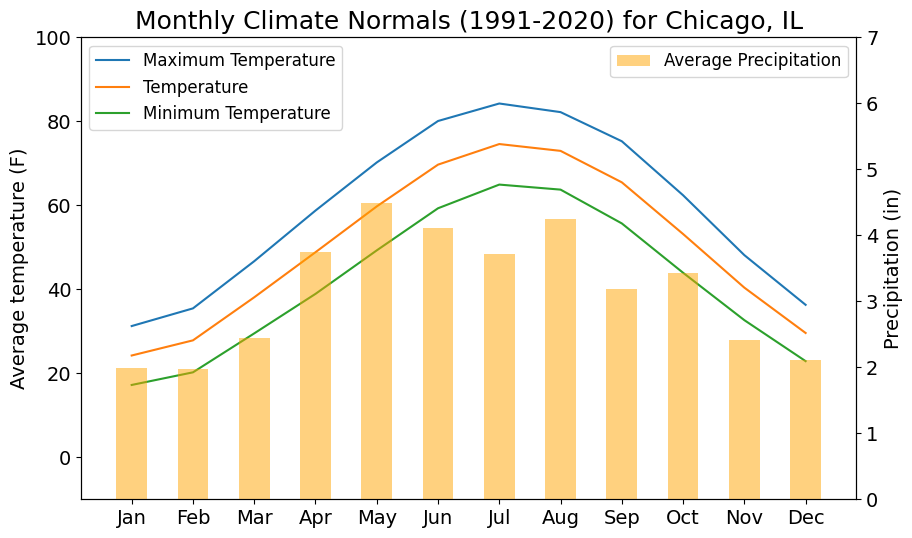

In [13]:
# Create figure and axis #1
fig, ax1 = plt.subplots(figsize=(10,6))

# Line plots for temperatures on axis #1
ax1.plot(monthly_TMAX)
ax1.plot(monthly_TAVG) 
ax1.plot(monthly_TMIN)
ax1.set_ylabel('Average temperature (F)', fontsize=14)
ax1.set_ylim(-10, 100)
ax1.legend(['Maximum Temperature', 'Temperature', 'Minimum Temperature'], loc="upper left", fontsize=12)
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(monthly_TAVG.index, labels, fontsize=14)
plt.yticks(fontsize=14)

# Set up the second axis; used for precip bar charts
ax2 = ax1.twinx()
ax2.bar(monthly_p.index, monthly_p, width=0.5, alpha=0.5, color='orange')
ax2.grid(False) # turn off grid #2
ax2.set_ylabel('Precipitation (in)', fontsize=14)
ax2.set_ylim(0, 7)
ax2.legend(['Average Precipitation'], loc="upper right", fontsize=12)
plt.yticks(fontsize=14)
plt.title('Monthly Climate Normals (1991-2020) for Chicago, IL', fontsize=18)
plt.show()